# 测一下PIL基本使用，尤其是fromarray

In [4]:
from PIL import Image
from pylab import *
#读取图片并转为数组
data_dir = '/home/qw/Documents/tf_demo/MNIST_data/raw/mnist_train_36.jpg'#虽然是jpg，但是只有二维，这已经是灰度图了
data_dir = '/home/qw/Documents/tf_demo/mergedImage.png'#这是四通道的
data_dir = '/home/qw/Documents/tf_demo/lapnorm.jpg'#三通道

im = array(Image.open(data_dir))
print(im.shape,im.dtype)
print(im[100,100,0])#一个点在RGB通道的像素值
print(im[100,100,0:3])#一个点在RGB通道的像素值
print(im[100,100])#及类型

(438, 438, 3) uint8
123
[123 103 140]
[123 103 140]


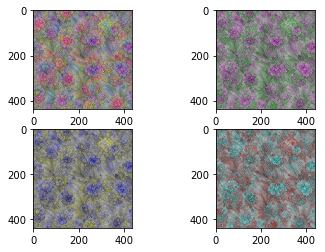

In [32]:
# -*- coding: utf-8 -*-
from PIL import Image
from pylab import *
#读取图片并转为数组
data_dir = '/home/qw/Documents/tf_demo/lapnorm.jpg'#三通道
im = array(Image.open(data_dir))
subplot(221)
imshow(im)#原图

#交换红蓝通道并显示
subplot(222)
r = im[:,:,0]#红色通道
im[:,:,0] = im[:,:,2]
im[:,:,2] = r
imshow(im)

#交换通道并显示
subplot(223)
im[:,:,0], im[:,:,1] = im[:,:,1], im[:,:,0]
imshow(im)
#交换通道并显示
subplot(224)
im[:,:,1], im[:,:,2] = im[:,:,2], im[:,:,1]
imshow(im)

show()

without convert: (438, 438, 3) uint8
with convert: (438, 438) float32
pixel (100,100): 113.0
(438, 438)
input: <class 'numpy.ndarray'> (438, 438)
return: <class 'PIL.Image.Image'>


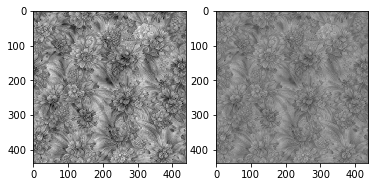

In [44]:
from PIL import Image
from pylab import *
#读取图片,灰度化，并转为数组
data_dir = '/home/qw/Documents/tf_demo/lapnorm.jpg'#三通道
im1 = array(Image.open(data_dir))#数据类型——浮点数
im = array(Image.open(data_dir).convert('L'),'f')#数据类型——浮点数
#输出数组的各维度长度以及类型
print('without convert:', im1.shape,im1.dtype)#3通道，整型。
print('with convert:', im.shape,im.dtype)
print('pixel (100,100):',im[100,100])#输出坐标100,100的值
subplot(121)
imshow(im)

#说重点：array和fromarray是反操作。
#fromarray不报错,单通道是允许的，和报错的例子区别只是typestr的key值
print('input:',type(im),im.shape)
im_reverse = Image.fromarray(im)
print('return:',type(im_reverse))
subplot(122)
imshow(im_reverse)

show()

58 193
62 197
122 175
13 146


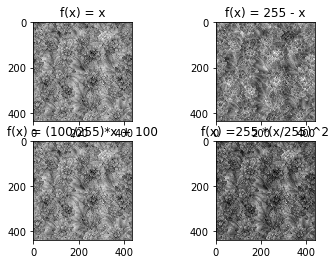

In [1]:
#下面程序中有一些简单的变换：
from PIL import Image
from pylab import *
#读取图片,灰度化，并转为数组
data_dir = '/home/qw/Documents/tf_demo/lapnorm.jpg'#三通道
im = array(Image.open(data_dir).convert('L'))
im2 = 255 - im # 对图像进行反相处理
im3 = (100.0/255) * im + 100 # 将图像像素值变换到 100...200 区间
im4 = 255.0 * (im/255.0)**2 # 对图像像素值求平方后得到的图像(二次函数变换，使较暗的像素值变得更小)
#2x2显示结果 使用第一个显示原灰度图
subplot(221)
title('f(x) = x')
gray()
imshow(im)
#2x2显示结果 使用第二个显示反相图
subplot(222)
title('f(x) = 255 - x')
gray()
imshow(im2)
#2x2显示结果 使用第三个显示100-200图
subplot(223)
title('f(x) = (100/255)*x + 100')
gray()
imshow(im3)
#2x2显示结果 使用第四个显示二次函数变换图
subplot(224)
title('f(x) =255 *(x/255)^2')
gray()
imshow(im4)
#输出图中的最大和最小像素值
print(int(im.min()),int(im.max()))
print(int(im2.min()),int(im2.max()))
print(int(im3.min()),int(im3.max()))
print(int(im4.min()),int(im4.max()))
show()

# 一个Img变ndarray加噪声还原为Img的例子

<class 'numpy.ndarray'>
(438, 438, 3)
<class 'numpy.ndarray'> (438, 438, 3)
im1: <class 'numpy.ndarray'> 3
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'> 3
im32: <class 'PIL.Image.Image'>
im33: <class 'numpy.ndarray'>
im34: <class 'PIL.Image.Image'>


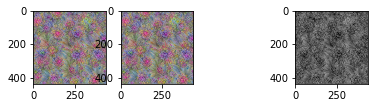

In [46]:
import numpy as np
from pylab import *#array()和imshow() show()都属于他,好像也不属于他，分别是numpy matplotlib.pyplot，但是可能pylab里边引用了？
data_dir = '/home/qw/Documents/tf_demo/lapnorm.jpg'#三通道
#im = array(Image.open(data_dir).convert('L'),'f')#数据类型——浮点数

im = array(Image.open(data_dir))

print(type(im))
print((im).shape)
n = 10#加噪声次数
for k in range(n):
    i = int(np.random.random() * im.shape[1]);
    j = int(np.random.random() * im.shape[0]);#随机像素点
    #print('i:',i)
    #根据维度不同，灰度图直接噪声255,RGB把三通道变255
    if im.ndim == 2:
        im[j,i] = 255
    elif im.ndim == 3:
        im[j,i,0]= 255
        im[j,i,1]= 255
        im[j,i,2]= 255
print(type(im), im.shape)
subplot(141)
imshow(im)

#fromarray传入是ndarray，传出是Image，没错啊，为什么另一个不行？因为没有三通道？不是。

#im_ = Image.fromarray(im.astype('uint8')).convert('RGB')
#分解
im1 = im.astype('uint8')
print('im1:',type(im1), im1.ndim)
im2 = Image.fromarray(im1)
print(type(im2))
im3 = im2.convert('RGB')
print(type(im3))

im_ = im3

print(type(im_), im.ndim)
subplot(142)
imshow(im_)

#单通道一样不报错。。。。
im32 = im3.convert('L')
print('im32:',type(im32))
im33 = array(im32)
print('im33:',type(im33))
im34 = Image.fromarray(im33)
print('im34:',type(im34))
subplot(144)
imshow(im34)
show()

# 粘贴官方实现代码

In [5]:
def fromarray(obj, mode=None):
    """
    从导出array interface的obj创建图像内存（使用protobuf协议）。
    如果obj不是连续的，则调用tobytes方法并使用：py:func:`~pil.image.frombuffer`。 
    :param obj: 带obj.__array_interface__的
    :param mode: Mode to use (will be determined from type if None)
      See: :ref:`concept-modes`.
    :returns: An image object.
    """
    arr = obj.__array_interface__#<class 'dict'>  其实是一个字典打包输入！！！obj自己实现的接口
    shape = arr['shape']#字典中的key，得到图像shape
    ndim = len(shape)#维度，（48*48的灰度图是二维，有颜色多通道就是三维。）
    print('in fromarray :Image._fromarray_typemap is :',Image._fromarray_typemap)
    strides = arr.get('strides', None)#没有strides就给赋值None
    if mode is None:
        try:
            typekey = (1, 1) + shape[2:], arr['typestr']
            mode, rawmode = Image._fromarray_typemap[typekey]#这是从一个typemap找匹配出错了
        except KeyError:
            print(typekey)
            raise TypeError("Cannot handle this data type")
    else:
        rawmode = mode
    if mode in ["1", "L", "I", "P", "F"]:
        ndmax = 2
    elif mode == "RGB":
        ndmax = 3
    else:
        ndmax = 4
    if ndim > ndmax:
        raise ValueError("Too many dimensions: %d > %d." % (ndim, ndmax))

    size = shape[1], shape[0]
    if strides is not None:
        if hasattr(obj, 'tobytes'):
            obj = obj.tobytes()
        else:
            obj = obj.tostring()

    return Image.frombuffer(mode, size, obj, "raw", rawmode, 0, 1)


<class 'numpy.ndarray'>
(438, 438, 3)
<class 'numpy.ndarray'> (438, 438, 3)


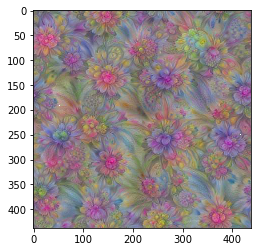

In [6]:
import numpy as np
from pylab import *
data_dir = '/home/qw/Documents/tf_demo/lapnorm.jpg'#三通道
#im = array(Image.open(data_dir).convert('L'),'f')#数据类型——浮点数

#im = np.array(Image.open(data_dir))
im = np.array(Image.open(data_dir))#array和np.array功能一样，输出都是ndarray
print(type(im))
print((im).shape)
n = 10#加噪声次数
for k in range(n):
    i = int(np.random.random() * im.shape[1]);
    j = int(np.random.random() * im.shape[0]);#随机像素点
    #print('i:',i)
    #根据维度不同，灰度图直接噪声255,RGB把三通道变255
    if im.ndim == 2:
        im[j,i] = 255
    elif im.ndim == 3:
        im[j,i,0]= 255
        im[j,i,1]= 255
        im[j,i,2]= 255
print(type(im), im.shape)
imshow(im)
show()

im1: <class 'numpy.ndarray'> 3
in fromarray :Image._fromarray_typemap is : {((1, 1), '|u1'): ('L', 'L'), ((1, 1), '|i1'): ('I', 'I;8'), ((1, 1), '<u2'): ('I', 'I;16'), ((1, 1), '>u2'): ('I', 'I;16B'), ((1, 1), '<i2'): ('I', 'I;16S'), ((1, 1), '>i2'): ('I', 'I;16BS'), ((1, 1), '<u4'): ('I', 'I;32'), ((1, 1), '>u4'): ('I', 'I;32B'), ((1, 1), '<i4'): ('I', 'I'), ((1, 1), '>i4'): ('I', 'I;32BS'), ((1, 1), '<f4'): ('F', 'F'), ((1, 1), '>f4'): ('F', 'F;32BF'), ((1, 1), '<f8'): ('F', 'F;64F'), ((1, 1), '>f8'): ('F', 'F;64BF'), ((1, 1, 2), '|u1'): ('LA', 'LA'), ((1, 1, 3), '|u1'): ('RGB', 'RGB'), ((1, 1, 4), '|u1'): ('RGBA', 'RGBA')}
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'> 3
im32: <class 'PIL.Image.Image'>
im33: <class 'numpy.ndarray'>
interface: {'data': (27406832, False), 'strides': None, 'descr': [('', '|u1')], 'typestr': '|u1', 'shape': (438, 438), 'version': 3}
parameters number: 6
|u1
im34: <class 'PIL.Image.Image'>


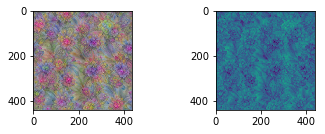

In [7]:
#fromarray传入是ndarray，传出是Image，没错啊，为什么另一个不行？因为没有三通道？不是。
im1 = im.astype('uint8')
print('im1:',type(im1), im1.ndim)
#im1.convert('L')  convert shi Image的

# im2 = Image.fromarray(im1)
im2 = fromarray(im1)
print(type(im2))
im3 = im2.convert('RGB')
print(type(im3))

im_ = im3
#im_ = Image.fromarray(im.astype('uint8')).convert('RGB')#分解
print(type(im_), im.ndim)
subplot(221)
imshow(im_)


im32 = im3.convert('L')
print('im32:',type(im32))
im33 = array(im32)
print('im33:',type(im33))#单通道一样不报错
print('interface:',im33.__array_interface__)# 'typestr': '|u1'
print('parameters number:',len(im33.__array_interface__))# 'typestr': '|u1'
print(im33.__array_interface__['typestr'])
im34 = Image.fromarray(im33)
print('im34:',type(im34))
subplot(222)
imshow(im34)
show()

# 测一下Image的attribute，还有灰度转换
灰度图像：
灰度数字图像是每个像素只有一个采样颜色的图像。这类图像通常显示为从最暗黑色到最亮的白色的灰度。
1.浮点算法：Gray=R*0.3+G*0.59+B*0.11（看公式，应该是L了）
2.整数方法：Gray=(R*30+G*59+B*11)/100
3.移位方法：Gray =(R*76+G*151+B*28)>>8;
4.平均值法：Gray=（R+G+B）/3;
5.仅取绿色：Gray=G；
通过上述任一种方法求得Gray后，将原来的RGB(R,G,B)中的R,G,B统一用Gray替换，形成新的颜色RGB(Gray,Gray,Gray)，用它替换原来的RGB(R,G,B)就是灰度图了。

说了这么多，怎么变？自己手动变？Image.convert没这么多种

RGB (438, 438)
before convert, pixel: (113, 101, 139)
manual compute: 108.92
<class 'PIL.Image.Image'> (438, 438)
after im_converted_mode_1 convert, pixel: 255
<class 'PIL.Image.Image'> (438, 438)
after im_converted_mode_L convert, pixel: 108
<class 'PIL.Image.Image'> (438, 438)
after im_converted_mode_P convert, pixel: 133
<class 'PIL.Image.Image'> (438, 438)
after im_converted_mode_F convert, pixel: 108
equal: True
equal: True


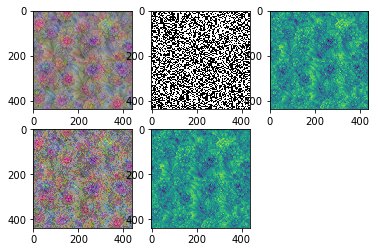

In [42]:

data_dir = '/home/qw/Documents/tf_demo/lapnorm.jpg'#三通道

im = Image.open(data_dir)
print(im.mode, im.size)#size，不是shape

specified_coord = (0,0)
specified_coord = (222,22)
specified_pixels = im.getpixel(specified_coord)


#手动计算灰色，L = R * 299/1000 + G * 587/1000+ B * 114/1000
manual_computed_pixels_val = specified_pixels[0] * 299/1000 + specified_pixels[1] * 587/1000 + specified_pixels[2] * 114/1000
print('before convert, pixel:',specified_pixels)#坐标是tuple，是一个参数
print('manual compute:', manual_computed_pixels_val)

im_converted_mode_1 = im.convert('1')#1,不是l。。。。有L
im_converted_mode_L = im.convert('L')#灰色，L
im_converted_mode_P = im.convert('P')
im_converted_mode_F = im.convert('L')#灰色，L
#其他还有CMYK、YCbCr、RGBA等等，

print(type(im_converted_mode_1),im_converted_mode_1.size)#转化前后都是Image，size不变
print('after im_converted_mode_1 convert, pixel:',im_converted_mode_1.getpixel(specified_coord))#像素值变了

#不同的模式转换，像素值不同
print(type(im_converted_mode_L),im_converted_mode_L.size)#转化前后都是Image，size不变
print('after im_converted_mode_L convert, pixel:',im_converted_mode_L.getpixel(specified_coord))#像素值变了
print(type(im_converted_mode_P),im_converted_mode_P.size)#转化前后都是Image，size不变
print('after im_converted_mode_P convert, pixel:',im_converted_mode_P.getpixel(specified_coord))#像素值变了
print(type(im_converted_mode_F),im_converted_mode_F.size)#转化前后都是Image，size不变
print('after im_converted_mode_F convert, pixel:',im_converted_mode_F.getpixel(specified_coord))#像素值变了


#和手动计算的完全相等，取的是整数部分
print('equal:',im_converted_mode_L.getpixel(specified_coord) == int(manual_computed_pixels_val))
print('equal:',im_converted_mode_F.getpixel(specified_coord) == int(manual_computed_pixels_val))

subplot(231)
imshow(im)
subplot(232)
imshow(im_converted_mode_1)
subplot(233)
imshow(im_converted_mode_L)
subplot(234)
imshow(im_converted_mode_P)
subplot(235)
imshow(im_converted_mode_F)


show()

In [12]:
help(im.getpixel)

Help on method getpixel in module PIL.Image:

getpixel(xy) method of PIL.JpegImagePlugin.JpegImageFile instance
    Returns the pixel value at a given position.
    
    :param xy: The coordinate, given as (x, y).
    :returns: The pixel value.  If the image is a multi-layer image,
       this method returns a tuple.



# 关于from pylab import *
array()和imshow() show()都属于他,好像也不属于他，分别是numpy matplotlib.pyplot，但是可能pylab里边引用了？
找一下这个pylab：

matplotlib下的模块pyplot和pylab


(pylab combines pyplot with numpy into a single namespace. This is convenient for interactive work, but for programming it is recommended that the namespaces be kept separate)

pylab是结合了pyplot和numpy的一个名字空间。用起来方便点，但是不太符合工程习惯，突如其来array()show()真的蒙蔽。
from pylab import *
这个习惯很差
import pylab as pl
其次，至少这个还有个前缀
import numpy as np
import matplotlib.pyplot as plt
最好，清晰

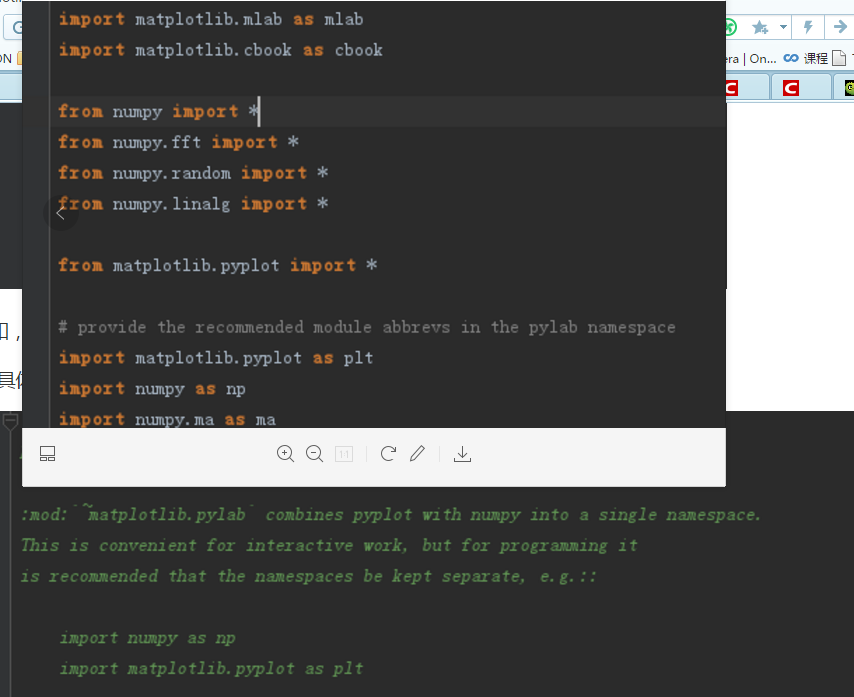
#################################################################################

附在使用matplotlib及相关模块时可能用得上的资料网址：

Matplotlib.pdf  http://matplotlib.org/Matplotlib.pdf

Python科学计算  http://hyry.dip.jp/tech/book/page/scipy/matplotlib.html

In [1]:
import PIL
help(PIL)
#     PILLOW_VERSION = '4.1.1'
#     VERSION = '1.1.7'

Help on package PIL:

NAME
    PIL

DESCRIPTION
    # The Python Imaging Library.
    # $Id$
    #
    # package placeholder
    #
    # Copyright (c) 1999 by Secret Labs AB.
    #
    # See the README file for information on usage and redistribution.
    #

PACKAGE CONTENTS
    BdfFontFile
    BmpImagePlugin
    BufrStubImagePlugin
    ContainerIO
    CurImagePlugin
    DcxImagePlugin
    DdsImagePlugin
    EpsImagePlugin
    ExifTags
    FitsStubImagePlugin
    FliImagePlugin
    FontFile
    FpxImagePlugin
    FtexImagePlugin
    GbrImagePlugin
    GdImageFile
    GifImagePlugin
    GimpGradientFile
    GimpPaletteFile
    GribStubImagePlugin
    Hdf5StubImagePlugin
    IcnsImagePlugin
    IcoImagePlugin
    ImImagePlugin
    Image
    ImageChops
    ImageCms
    ImageColor
    ImageDraw
    ImageDraw2
    ImageEnhance
    ImageFile
    ImageFilter
    ImageFont
    ImageGrab
    ImageMath
    ImageMode
    ImageMorph
    ImageOps
    ImagePalette
    ImagePath
    ImageQt
    Image

In [52]:
import pillow

ModuleNotFoundError: No module named 'pillow'

In [ ]:
#好像PIL只支持python2.7?但是看起来也能用啊。。。。。
#我需要Pillow

